In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers.legacy import Adam
from keras.utils import to_categorical
from keras.layers import Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
import cv2
from sklearn.model_selection import train_test_split
import pickle
import os
import pandas as pd
import random
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import h5py


2023-12-10 22:58:36.659690: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-10 22:58:36.718936: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-10 22:58:37.585937: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:

path = "FaceShape_Dataset"
labelFile = 'FaceLabels.csv'
batch_size_val = 50
steps_per_epoch_val = 1000
epochs_val = 30
imageDimesions = (32, 32, 3)
testRatio = 0.2
validationRatio = 0.2

count = 0
images = []
classNo = []
myList = os.listdir(path)
print("Total Classes Detected:", len(myList))
noOfClasses = len(myList)
print("Importing Classes.....")
for x in range(0, len(myList)):
    myPicList = os.listdir(path + "/" + str(count))
    for y in myPicList:
        try:
            curImg = cv2.imread(path + "/" + str(count) + "/" + y)

            dim = (32, 32)

            resized = cv2.resize(curImg, dim, interpolation=cv2.INTER_AREA)

            images.append(resized)
            classNo.append(count)

        except Exception as e:
            print(str(e))
    print(count, end=" ")
    count += 1
print(" ")
images = np.array(images)
classNo = np.array(classNo)

X_train, X_test, y_train, y_test = train_test_split(images, classNo, test_size=testRatio)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validationRatio)



Total Classes Detected: 5
Importing Classes.....


Premature end of JPEG file


OpenCV(4.8.1) /io/opencv/modules/imgproc/src/resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

0 OpenCV(4.8.1) /io/opencv/modules/imgproc/src/resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.8.1) /io/opencv/modules/imgproc/src/resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

1 2 3 

Premature end of JPEG file


4  


Data Shapes
Train(3199, 32, 32, 3) (3199,)
Validation(800, 32, 32, 3) (800,)
Test(1000, 32, 32, 3) (1000,)
data shape  (5, 2) <class 'pandas.core.frame.DataFrame'>
[617, 633, 656, 645, 648]


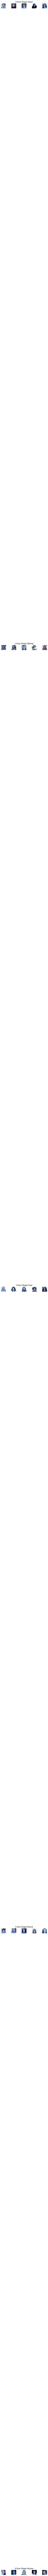

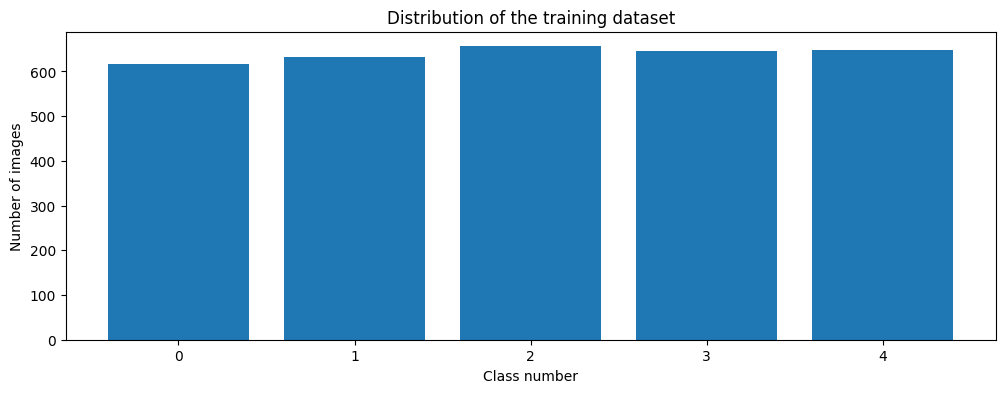

In [3]:


print("Data Shapes")
print("Train", end="");
print(X_train.shape, y_train.shape)
print("Validation", end="");
print(X_validation.shape, y_validation.shape)
print("Test", end="");
print(X_test.shape, y_test.shape)

data = pd.read_csv(labelFile)
print("data shape ", data.shape, type(data))

num_of_samples = []
cols = 5
num_classes = noOfClasses
fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5, 300))
fig.tight_layout()
for i in range(cols):
    for j, row in data.iterrows():
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0, len(x_selected) - 1), :, :], cmap=plt.get_cmap("gray"))
        axs[j][i].axis("off")
        if i == 2:
            axs[j][i].set_title(str(j) + "-" + row["Name"])
            num_of_samples.append(len(x_selected))

print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()



In [4]:

import logging

# Set up the logging configuration
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

def grayscale(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img

def equalize(img):
    img = cv2.equalizeHist(img)
    return img

def preprocessing(img):
    img = grayscale(img)
    img = equalize(img)
    img = img / 255
    return img

# Preprocess the images and log the progress
def preprocess_images(images, set_name):
    preprocessed_images = []
    for i, img in enumerate(images):
        # logger.info(f"Preprocessing {set_name} image {i + 1}/{len(images)}")
        preprocessed_img = preprocessing(img)
        preprocessed_images.append(preprocessed_img)
    return np.array(preprocessed_images)

print("Preprocessing started for X_TRAIN")
X_train = preprocess_images(X_train, "training")
print("Preprocessing ended for X_TRAIN")

print("Preprocessing started for X_VALIDATION")
X_validation = preprocess_images(X_validation, "validation")
print("Preprocessing ended for X_VALIDATION")

print("Preprocessing started for X_TEST")
X_test = preprocess_images(X_test, "test")
print("Preprocessing ended for X_TEST")

print("Preprocessing Done")


# cv2.imshow("GrayScale Images",
#            X_train[random.randint(0, len(X_train) - 1)])
# cv2.waitKey(0)  # Wait indefinitely until a key is pressed
# cv2.destroyAllWindows()  # Close all OpenCV windows

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_validation = X_validation.reshape(X_validation.shape[0], X_validation.shape[1], X_validation.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

print("Reshape Done")


Preprocessing started for X_TRAIN
Preprocessing ended for X_TRAIN
Preprocessing started for X_VALIDATION
Preprocessing ended for X_VALIDATION
Preprocessing started for X_TEST
Preprocessing ended for X_TEST
Preprocessing Done
Reshape Done


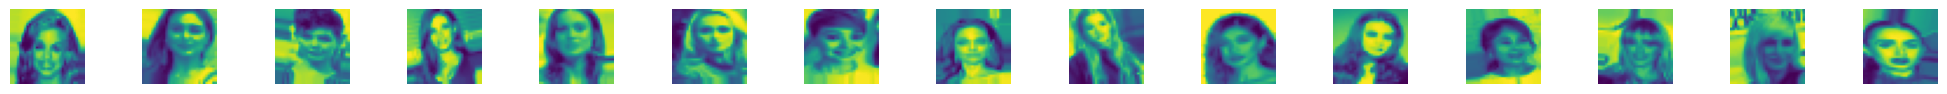

Epoch 1/30


2023-12-10 22:59:13.880110: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-10 22:59:13.893536: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-10 22:59:13.893676: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

63/63 [==============================] - 1s 6ms/step - loss: 1.6116 - accuracy: 0.1937 - val_loss: 1.6088 - val_accuracy: 0.2000
Epoch 2/30
63/63 [==============================] - 1s 4ms/step - loss: 1.5932 - accuracy: 0.2499 - val_loss: 1.5854 - val_accuracy: 0.2675
Epoch 3/30
63/63 [==============================] - 0s 4ms/step - loss: 1.5625 - accuracy: 0.2928 - val_loss: 1.5275 - val_accuracy: 0.3688
Epoch 4/30
63/63 [==============================] - 0s 4ms/step - loss: 1.5350 - accuracy: 0.3099 - val_loss: 1.5100 - val_accuracy: 0.3750
Epoch 5/30
63/63 [==============================] - 0s 4ms/step - loss: 1.5257 - accuracy: 0.3255 - val_loss: 1.4787 - val_accuracy: 0.3638
Epoch 6/30
63/63 [==============================] - 0s 4ms/step - loss: 1.5003 - accuracy: 0.3557 - val_loss: 1.4624 - val_accuracy: 0.3675
Epoch 7/30
63/63 [==============================] - 0s 4ms/step - loss: 1.4831 - accuracy: 0.3566 - val_loss: 1.4521 - val_accuracy: 0.4038
Epoch 8/30
63/63 [=============

In [5]:

dataGen = ImageDataGenerator(width_shift_range=0.1,
                             # 0.1 = 10%     IF MORE THAN 1 E.G 10 THEN IT REFFERS TO NO. OF  PIXELS EG 10 PIXELS
                             height_shift_range=0.1,
                             zoom_range=0.2,  # 0.2 MEANS CAN GO FROM 0.8 TO 1.2
                             shear_range=0.1,  # MAGNITUDE OF SHEAR ANGLE
                             rotation_range=10)  # DEGREES

dataGen.fit(X_train)

batches = dataGen.flow(X_train, y_train,
                       batch_size=20)
X_batch, y_batch = next(batches)

fig, axs = plt.subplots(1, 15, figsize=(20, 5))
fig.tight_layout()

for i in range(15):
    axs[i].imshow(X_batch[i].reshape(imageDimesions[0], imageDimesions[1]))
    axs[i].axis('off')
plt.show()

y_train = to_categorical(y_train, noOfClasses)
y_validation = to_categorical(y_validation, noOfClasses)
y_test = to_categorical(y_test, noOfClasses)


def myModel():
    no_Of_Filters = 60
    size_of_Filter = (5, 5)

    size_of_Filter2 = (3, 3)
    size_of_pool = (2, 2)
    no_Of_Nodes = 500
    model = Sequential()
    model.add((Conv2D(no_Of_Filters, size_of_Filter, input_shape=(imageDimesions[0], imageDimesions[1], 1),
                      activation='relu')))
    model.add((Conv2D(no_Of_Filters, size_of_Filter, activation='relu')))
    model.add(MaxPooling2D(pool_size=size_of_pool))

    model.add((Conv2D(no_Of_Filters // 2, size_of_Filter2, activation='relu')))
    model.add((Conv2D(no_Of_Filters // 2, size_of_Filter2, activation='relu')))
    model.add(MaxPooling2D(pool_size=size_of_pool))
    model.add(Dropout(0.5))

    model.add(Flatten())
    model.add(Dense(no_Of_Nodes, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(noOfClasses, activation='softmax'))

    model.compile(Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model


model = myModel()
history = model.fit(X_train, y_train, epochs=epochs_val, steps_per_epoch=len(X_train)//batch_size_val, batch_size=batch_size_val,
                    validation_data=(X_validation, y_validation), shuffle=1)



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 60)        1560      
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 60)        90060     
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 60)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 30)        16230     
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 30)          8130      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 4, 4, 30)          0         
 g2D)                                                   

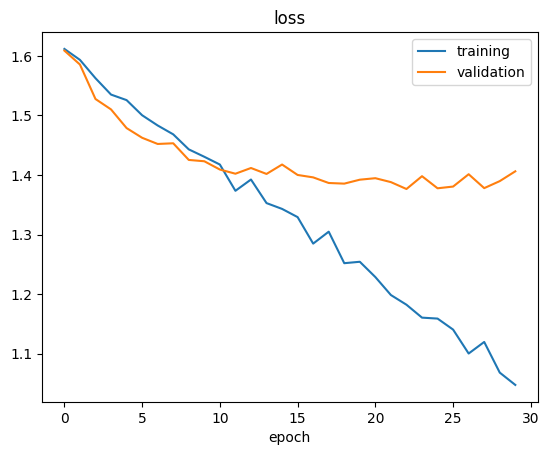

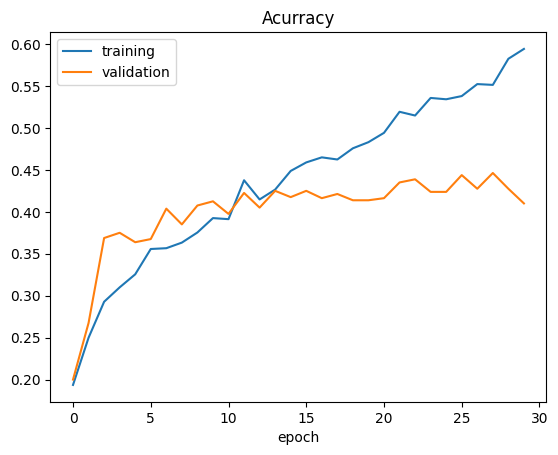

Test Score: 1.4034945964813232
Test Accuracy: 0.42399999499320984


-1

In [6]:
# STORE THE MODEL AS A PICKLE OBJECT
# model.save('faceshape_model_final.h5')

print(model.summary())

plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('loss')
plt.xlabel('epoch')
plt.figure(2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'])
plt.title('Acurracy')
plt.xlabel('epoch')
plt.show()
score = model.evaluate(X_test, y_test, verbose=0)
print('Test Score:', score[0])
print('Test Accuracy:', score[1])



cv2.waitKey(0)


In [7]:
from keras.utils import plot_model

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


32/32 [==============================] - 0s 873us/step


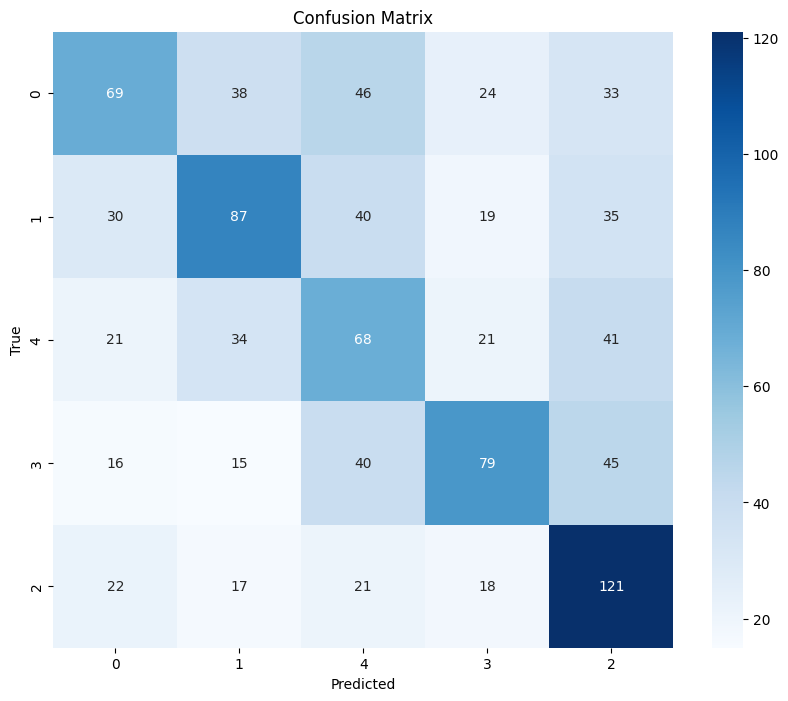

In [8]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

# Convert one-hot encoded labels back to class labels
y_test_classes = np.argmax(y_test, axis=1)

# Predict on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate confusion matrix
conf_mat = confusion_matrix(y_test_classes, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=myList, yticklabels=myList)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

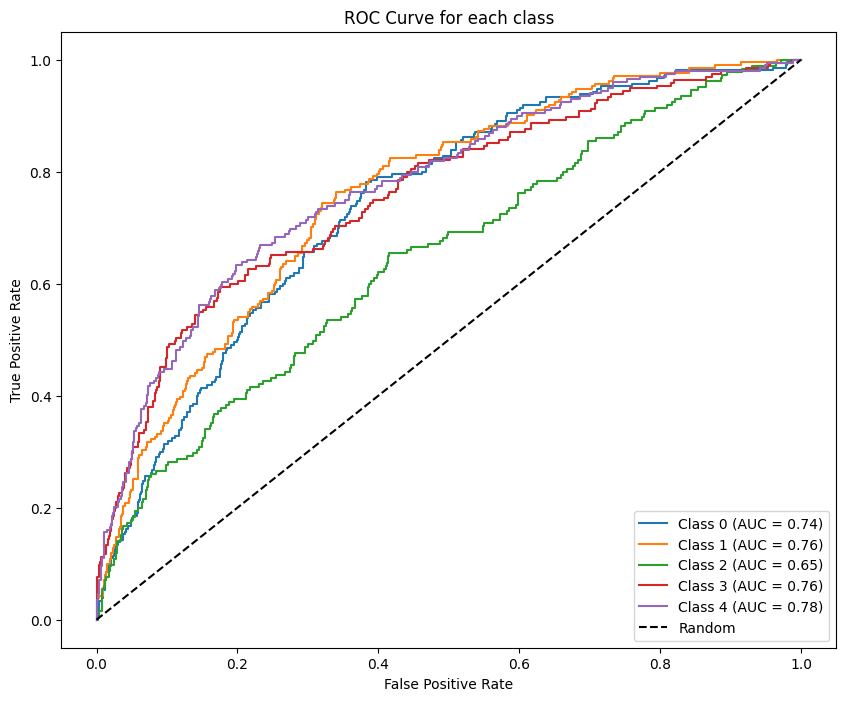

In [9]:
from sklearn.metrics import roc_curve, auc


# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(noOfClasses):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure(figsize=(10, 8))
for i in range(noOfClasses):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for each class')
plt.legend(loc="lower right")
plt.show()

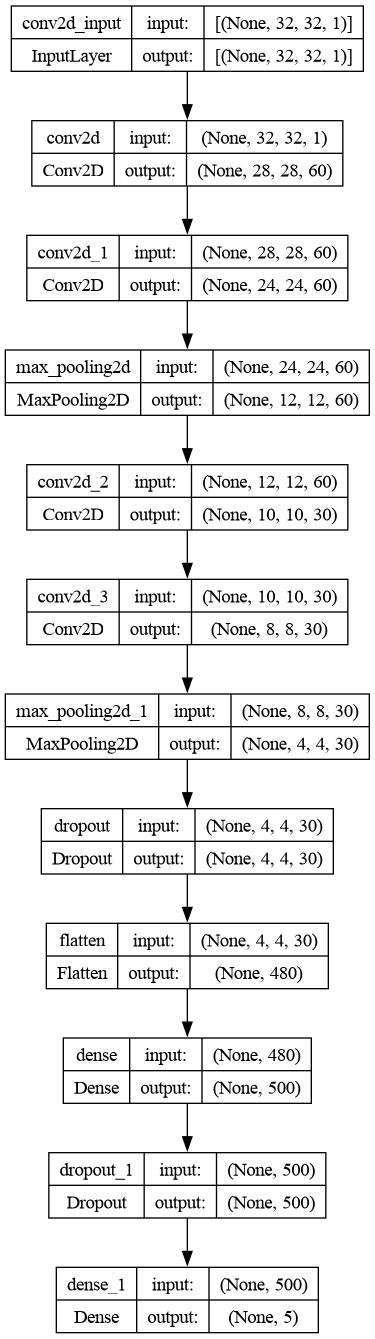

In [15]:
from keras.utils import plot_model

# Save the model architecture plot to a file
plot_model(model, to_file='model_plot.png', show_shapes=True, 
           show_layer_names=True)


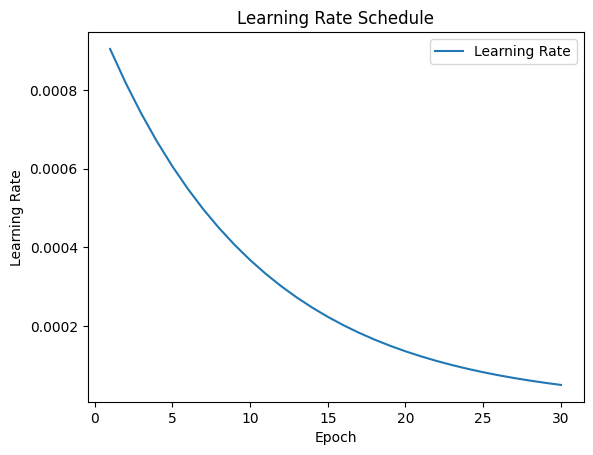

In [16]:
from keras.callbacks import LearningRateScheduler

# Define a learning rate schedule function
def lr_schedule(epoch):
    return 0.001 * np.exp(-0.1 * epoch)

# Plot the learning rate schedule
epochs = range(1, epochs_val + 1)
learning_rates = [lr_schedule(epoch) for epoch in epochs]

plt.plot(epochs, learning_rates, label='Learning Rate')
plt.title('Learning Rate Schedule')
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.legend()
plt.show()


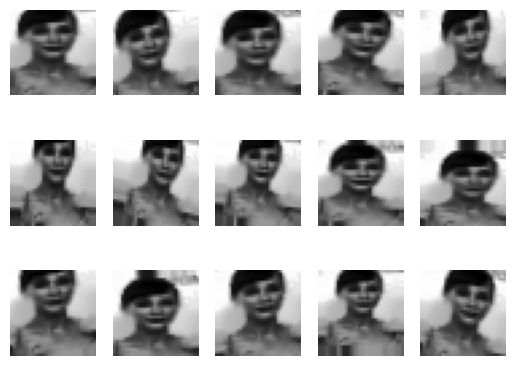

In [19]:
# Display augmented images
augmented_images = dataGen.flow(X_train[:1], batch_size=1)
for i in range(15):
    plt.subplot(3, 5, i + 1)
    augmented_image = augmented_images[0][0]
    plt.imshow(augmented_image.reshape(32, 32), cmap='gray')
    plt.axis('off')
plt.show()


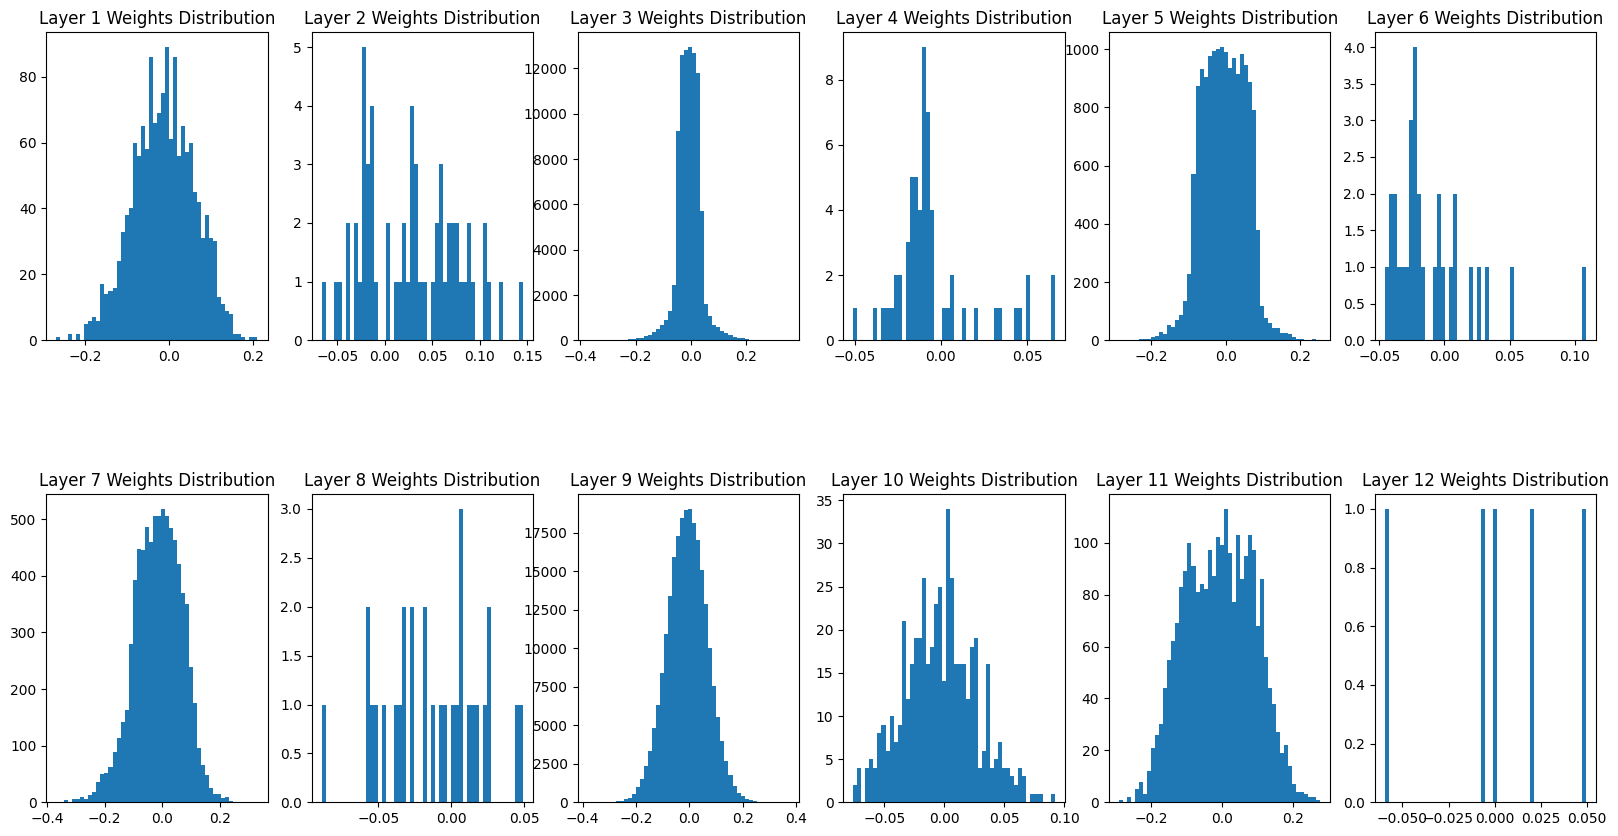

In [30]:
# Get the weights of the model
weights = model.get_weights()

# Plot the weight distributions for layers 1 to 6
plt.figure(figsize=(20, 10))
plt.subplots_adjust(hspace=0.5)

for i in range(6):
    plt.subplot(2, 6, i + 1)  # Two rows, six columns
    plt.hist(weights[i].flatten(), bins=50)
    plt.title(f'Layer {i + 1} Weights Distribution')

# Plot the weight distributions for layers 7 to 12
for i in range(6, 12):
    plt.subplot(2, 6, i + 1)  # Two rows, six columns
    plt.hist(weights[i].flatten(), bins=50)
    plt.title(f'Layer {i + 1} Weights Distribution')

plt.show()
